# **Chapter 1: The Machine Learning Landscape**

## **1. Pendahuluan**

Selamat datang di catatan studi untuk Bab 1 dari buku *"Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"*.

Seringkali, ketika kita mendengar istilah "Machine Learning" (ML), kita membayangkan robot futuristik atau kecerdasan buatan yang menyerupai manusia. Namun, pada kenyataannya, Machine Learning bukanlah fantasi masa depan, melainkan teknologi yang sudah ada di sekitar kita selama beberapa dekade, seperti filter spam pada email.

Dalam bab ini, kita akan membahas:
1.  **Definisi Machine Learning:** Apa bedanya dengan pemrograman tradisional?
2.  **Jenis-jenis Sistem ML:** Supervised, Unsupervised, Reinforcement Learning, dll.
3.  **Studi Kasus Sederhana:** Memprediksi kepuasan hidup berdasarkan GDP per kapita (Reproduksi Kode).
4.  **Tantangan Utama:** Masalah pada data dan algoritma.
5.  **Evaluasi:** Bagaimana kita tahu model kita bekerja dengan baik.

Tujuan dari notebook ini adalah memberikan pemahaman konseptual yang kuat sebelum kita melangkah ke penulisan kode yang lebih kompleks di bab-bab selanjutnya.

## **2. Apa itu Machine Learning?**

Secara sederhana, Machine Learning adalah ilmu (dan seni) memprogram komputer agar bisa belajar dari data.

Ada dua definisi populer yang sering dikutip:

> **Arthur Samuel (1959):** "[Machine Learning is the] field of study that gives computers the ability to learn without being explicitly programmed."

> **Tom Mitchell (1997):** Sebuah program komputer dikatakan belajar dari pengalaman $E$ terhadap tugas $T$ dan ukuran performa $P$, jika performanya pada $T$, sebagaimana diukur oleh $P$, meningkat seiring dengan pengalaman $E$.

### **Mengapa Menggunakan Machine Learning?**

Bayangkan kita ingin membuat filter spam.
* **Pendekatan Tradisional:** Kita harus menulis aturan manual yang panjang (misalnya: jika ada kata "gratis", tandai sebagai spam). Jika spammer mengubah kata "gratis" menjadi "Grat1s", kita harus menulis ulang kode kita.
* **Pendekatan Machine Learning:** Algoritma belajar pola kata-kata yang sering muncul di email spam vs non-spam (ham). Jika spammer mengubah taktik, model dapat beradaptasi secara otomatis jika diberi data baru.

**Keunggulan ML:**
* Menggantikan daftar aturan yang panjang dan sulit dipelihara.
* Mampu menangani masalah kompleks yang sulit diselesaikan dengan pemrograman konvensional (seperti *speech recognition*).
* Dapat beradaptasi dengan lingkungan yang berubah.
* Membantu manusia belajar (Data Mining) untuk menemukan pola tersembunyi.

## **3. Jenis-jenis Sistem Machine Learning**

Sistem ML dapat dikategorikan berdasarkan beberapa kriteria utama:

### **A. Berdasarkan Supervisi Manusia**

1.  **Supervised Learning (Pembelajaran Terawasi):**
    Data pelatihan yang diberikan ke algoritma mencakup label (kunci jawaban).
    * *Contoh:* Klasifikasi spam (label: Spam/Ham), Prediksi harga mobil (Regression).

2.  **Unsupervised Learning (Pembelajaran Tak Terawasi):**
    Data pelatihan tidak memiliki label. Sistem harus belajar struktur data tanpa "guru".
    * *Contoh:* Clustering (mengelompokkan pengunjung blog), Anomaly Detection (deteksi penipuan kartu kredit), Visualization.

3.  **Semisupervised Learning:**
    Kombinasi data berlabel (sedikit) dan tidak berlabel (banyak). Contohnya adalah Google Photos yang mengelompokkan wajah (clustering) dan kita hanya perlu memberi nama satu kali (labeling).

4.  **Reinforcement Learning:**
    Sistem (disebut *agent*) mengamati lingkungan, melakukan aksi, dan mendapatkan *reward* atau *penalty*. Tujuannya adalah memaksimalkan reward seiring waktu (Policy). Contoh: AlphaGo.

### **B. Batch vs Online Learning**

* **Batch Learning:** Sistem dilatih menggunakan seluruh data sekaligus secara offline. Jika ada data baru, sistem harus dilatih ulang dari nol.
* **Online Learning:** Sistem dilatih secara inkremental (bertahap) menggunakan data baru yang masuk secara berurutan. Cocok untuk data yang berubah cepat (saham) atau sumber daya terbatas.

### **C. Instance-based vs Model-based Learning**

Ini adalah tentang bagaimana sistem melakukan generalisasi.

* **Instance-based Learning:**
    Sistem menghafal data pelatihan. Prediksi dilakukan dengan membandingkan data baru dengan data lama menggunakan ukuran kemiripan (*similarity measure*).
    * *Contoh:* k-Nearest Neighbors.

* **Model-based Learning:**
    Sistem membangun model prediksi dari contoh-contoh pelatihan, kemudian menggunakan model tersebut untuk memprediksi data baru.
    * *Contoh:* Linear Regression.

## **4. Studi Kasus: Does Money Make People Happier?**

Di bagian ini, kita akan mereproduksi contoh kode dari buku (Example 1-1) untuk melihat perbedaan antara pendekatan *Model-based* dan *Instance-based*.

Kita ingin mengetahui apakah ada hubungan antara **GDP per capita** (pendapatan) dengan **Life Satisfaction** (kepuasan hidup).

Di bawah ini adalah data berdasarkan Tabel 1-1 di buku.


### **Langkah 1: Persiapan Data**

In [1]:
# Import library yang dibutuhkan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

# Mereproduksi data dari Tabel 1-1 di buku secara manual
# Data ini merepresentasikan subset negara untuk demonstrasi
data = {
    "Country": ["Hungary", "Korea", "France", "Australia", "United States"],
    "GDP per capita": [12240, 27195, 37675, 50962, 55805],
    "Life satisfaction": [4.9, 5.8, 6.5, 7.3, 7.2]
}

# Membuat DataFrame
country_stats = pd.DataFrame(data)

# Menampilkan data
print(country_stats)

         Country  GDP per capita  Life satisfaction
0        Hungary           12240                4.9
1          Korea           27195                5.8
2         France           37675                6.5
3      Australia           50962                7.3
4  United States           55805                7.2


### **Langkah 2: Visualisasi Data**

Sebelum memilih model, langkah pertama dalam proyek ML adalah mempelajari data. Kita akan memplot data tersebut untuk melihat trennya.

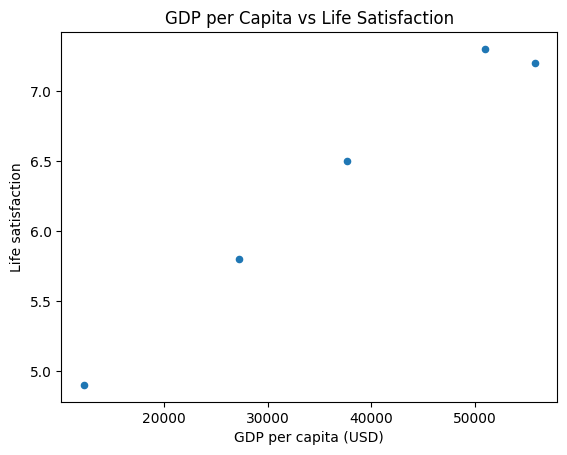

In [3]:
# Menyiapkan data X (fitur) dan y (label)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualisasi Data (Scatter Plot)
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.title("GDP per Capita vs Life Satisfaction")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.show()

**Interpretasi Visualisasi:**
Dari plot di atas (dan Gambar 1-17 di buku), terlihat adanya tren. Meskipun ada sedikit *noise*, kepuasan hidup cenderung naik seiring meningkatnya GDP negara tersebut. Oleh karena itu, kita bisa mencoba memodelkannya sebagai fungsi linear.

Persamaan model linear sederhana:
$$
\\text{life\_satisfaction} = \\theta_0 + \\theta_1 \\times \\text{GDP\_per\_capita}
$$
Di mana $\\theta_0$ dan $\\theta_1$ adalah parameter model.

In [4]:
# 1. Pilih model: Linear Regression
model_linear = sklearn.linear_model.LinearRegression()

# 2. Latih model (Training)
model_linear.fit(X, y)

# 3. Buat prediksi untuk negara baru (Cyprus)
# Anggap GDP Cyprus adalah $22,587 (berdasarkan buku)
X_new = [[22587]] 

print(f"Prediksi Kepuasan Hidup (Linear Regression) untuk Cyprus: {model_linear.predict(X_new)[0][0]:.2f}")

Prediksi Kepuasan Hidup (Linear Regression) untuk Cyprus: 5.54


### **Langkah 4: Melatih Model k-Nearest Neighbors (Instance-Based)**

Bagaimana jika kita menggunakan pendekatan *Instance-based*? Kita akan menggunakan *k-Nearest Neighbors (k-NN)* regression.

Konsepnya sederhana: cari negara dengan GDP yang paling mirip (dekat) dengan Cyprus, lalu lihat kepuasan hidup mereka. Dalam buku disebutkan Slovenia memiliki GDP terdekat ($20,732) dengan kepuasan hidup 5.7. Jika kita menggunakan $k=3$, kita akan merata-rata 3 negara terdekat."""

In [5]:
# 1. Pilih model: k-Nearest Neighbors Regression (k=3)
model_knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# 2. Latih model
# (Untuk k-NN, "melatih" sebenarnya hanya menyimpan data)
model_knn.fit(X, y)

# 3. Buat prediksi untuk Cyprus
print(f"Prediksi Kepuasan Hidup (k-NN) untuk Cyprus: {model_knn.predict(X_new)[0][0]:.2f}")


Prediksi Kepuasan Hidup (k-NN) untuk Cyprus: 5.73


**Pelajaran Penting:**
Kita baru saja melihat alur kerja khas proyek Machine Learning:
1.  Mempelajari data.
2.  Memilih model.
3.  Melatih model pada data pelatihan.
4.  Menggunakan model untuk inferensi (prediksi).

## **5. Tantangan Utama dalam Machine Learning**

Tugas utama kita adalah memilih algoritma dan melatihnya pada data. Maka, masalah yang bisa terjadi adalah "Algoritma Buruk" atau "Data Buruk".

### **A. Data Buruk (Bad Data)**

1.  **Jumlah Data Tidak Cukup:** ML butuh banyak data.
2.  **Data Pelatihan Tidak Representatif:** Agar generalisasi baik, data latihan harus mewakili kasus baru (Contoh: Sampling Bias pada pemilu AS 1936).
3.  **Kualitas Data Buruk:** Penuh error, outlier, dan noise.
4.  **Fitur Tidak Relevan (Irrelevant Features):** "Garbage in, garbage out".

### **B. Algoritma Buruk (Bad Algorithm)**

1.  **Overfitting (Terlalu Menghafal):** Model terlalu kompleks untuk data yang ada, sehingga mendeteksi noise sebagai pola. Solusinya: Regularization, lebih banyak data.
2.  **Underfitting (Terlalu Sederhana):** Model terlalu sederhana untuk menangkap struktur data. Solusinya: Model yang lebih kompleks."""

## **6. Testing dan Validasi**

Bagaimana kita tahu model kita bagus? Kita tidak boleh hanya mengukurnya pada data *training*.

### **Pemisahan Data (Split)**
1.  **Training Set:** Untuk melatih model (biasanya 80%).
2.  **Test Set:** Untuk menguji generalisasi model (biasanya 20%).

### **Hyperparameter Tuning & Validation Set**
Jika kita menyetel konfigurasi model (hyperparameter) menggunakan *test set* berulang-ulang, model akan bias.

Solusinya adalah **Holdout Validation**:
Kita menyisihkan sebagian data training sebagai **Validation Set**.
* Latih berbagai model pada *reduced training set*.
* Pilih model terbaik berdasarkan performa di *validation set*.
* Uji model final pada *test set*.

## **7. Kesimpulan**

Dalam bab ini, kita telah mempelajari dasar-dasar lanskap Machine Learning:

1.  **ML adalah** tentang pemrograman komputer untuk belajar dari data.
2.  Kita bisa menggunakan **Supervised** atau **Unsupervised Learning**.
3.  Sistem bisa belajar secara **Batch** atau **Online**.
4.  Prediksi bisa dilakukan dengan menghafal (**Instance-based**) atau membangun generalisasi (**Model-based**).
5.  Tantangan terbesar adalah **Data yang buruk** dan **Overfitting/Underfitting**.
6.  Penting untuk selalu memvalidasi model menggunakan **Test Set** dan **Validation Set**.